In [37]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [38]:
# read file and import as DataFrame 

df = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv', parse_dates=['date'])

#examine the head of DataFrame 

df.head ()


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
# select the country from DataFrame. For this one, I'd like to look at the Nethelands. 

nl_newcases = df[df['location']=='Netherlands']

# lets find out when first corona patient is detected in the Netherlands

nl_newcases= nl_newcases.query('new_cases>0').sort_values('new_cases', ascending=True)

nl_newcases.head(5).sort_values('date', ascending=True)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
23177,2020-02-28,Netherlands,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
23178,2020-02-29,Netherlands,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
23179,2020-03-01,Netherlands,5.0,0.0,7.0,0.0,7.0,0.0,7.0,0.0
23180,2020-03-02,Netherlands,6.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0
23181,2020-03-03,Netherlands,5.0,0.0,18.0,0.0,18.0,0.0,18.0,0.0


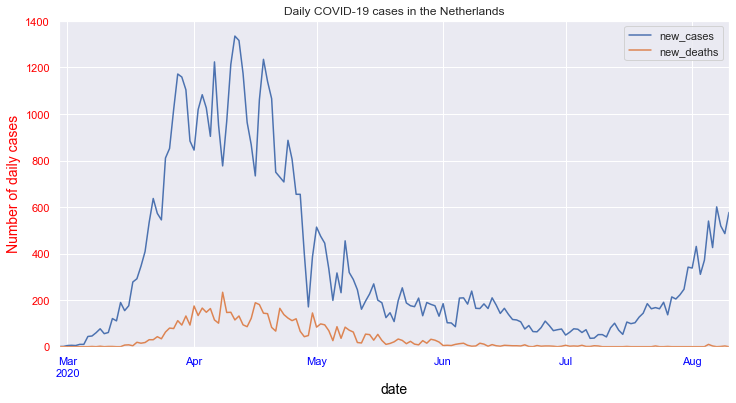

In [58]:
#using lineplot visualize the daily COVID-19 cases of the Netherlands from 2020-02-28 until now 

nl_newcases=nl_newcases.sort_values('date', ascending= True)


ax=nl_newcases.plot(x='date', y = 'new_cases', figsize=(12, 6), 
                    title ='Daily COVID-19 cases in the Netherlands')
nl_newcases.plot(x='date', y ='new_deaths', ax= ax)

# set styles
ax.set_xlabel('date', color='black', fontsize=14)
ax.tick_params('x', colors='blue')


ax.set_ylabel('Number of daily cases', color='red', fontsize=14)
ax.tick_params('y', colors='red')
ax.set_ylim(0)


plt.show()



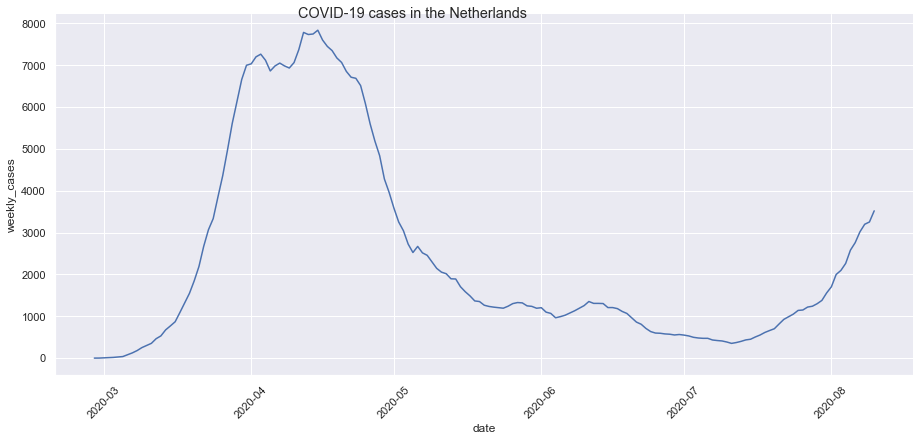

In [60]:
#  The same plot using Seaborn relplot 

sns.set(style='darkgrid')
g=sns.relplot(x='date', y='weekly_cases', data=nl_newcases, kind='line')
g.set_xticklabels(rotation=45)
g.fig.suptitle("COVID-19 cases in the Netherlands")
g.fig.set_size_inches(15, 6)
plt.show()


 It can be easly seen that the Covi-19 cases in the Netherland are inscreasing from July. 

In [61]:
# Lets look at the Benelux countries in EU 


eu = df[df['location'].isin([
    'Germany',
    'Netherlands',
'Luxembourg', 'Belgium']
)].reset_index(drop=True)

# let's subset the data from july 2020 until now 

eu_july= eu.query("date>= '2020-07-20'")


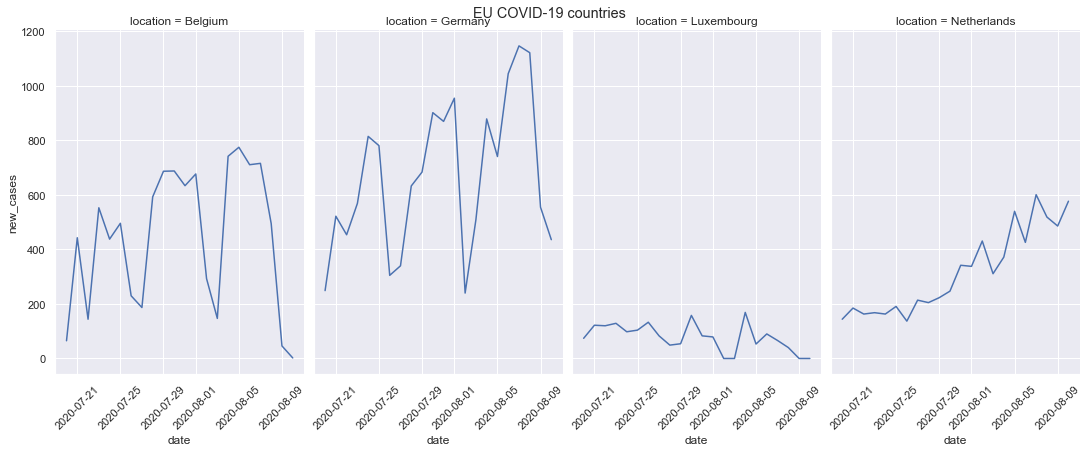

In [64]:
# plot 
sns.set_style('darkgrid')
g=sns.relplot(x='date', y='new_cases', data= eu_july, col= 'location', kind= 'line')
g.set_xticklabels(rotation=45)

g.fig.suptitle("EU COVID-19 countries")
g.fig.set_size_inches(15, 6)
plt.show()

As you can see here, I compared the neighboring countries to get an overview of the new cases in last few days. Only the new cases in the Netherlands are now increasing in last few days.